# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.calibration import LabelEncoder

## Load the Data

In [6]:
df = pd.read_csv('Datasets/Traffic_Accidents.csv')
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [8]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [9]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"'{column}': {unique_values}\n") 
  

'Location_Easting_OSGR': [560530. 508860. 314460. ... 423266. 475125. 456682.]

'Location_Northing_OSGR': [103950. 187170. 169130. ... 393153. 319380. 127058.]

'Longitude': [ 0.277298 -0.430574 -3.231459 ...  0.012032 -1.485264 -1.212104]

'Latitude': [50.812789 51.572846 51.414661 ... 51.252055 52.902301 51.56505 ]

'Police_Force': [47  1 62  4 21 33 10 98 16 20  7 13  6 42 12  5 41 32 43 45 46 36 35 97
 55 95 22 40 44 30 54 31 17 37 50 34 48 23 52 53 14 92 93 63  3 96 60 91
 11 94 61]

'Accident_Severity': [ 3.  1. nan  2.]

'Number_of_Vehicles': [ 1  2  3  4  6  7  5 10  9  8 11 12 34]

'Number_of_Casualties': [ 1.  2.  3. nan  4.  9.  7.  8.  5.  6. 42. 14. 12. 10. 13. 24. 51. 18.
 11. 23.]

'Date': ['27/11/2009' '10/10/2010' '14/09/2005' ... '24/03/2013' '25/02/2009'
 '03/02/2013']

'Day_of_Week': [6 1 4 7 3 5 2]

'Local_Authority_(District)': [556  26 746  84 257 363 146 148 917 228 307 129 203 112 462 206 182  20
 364 306  32 742  90 563 433 355 471 517 150  10 102 109   6 544 

In [10]:

df.replace(['na', 'Na', 'nA', 'NA', 'nan', 'Nan', 'nAn', 'NAn', 'naN', 'NaN', 'nAN', 'NAN', 'Unknown', 'other', "unknown", "other", "Bajaj", "Other", "Unknown"], np.nan, inplace=True)

df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [13]:
def clean_categorical_columns(df):
    for column in df.select_dtypes(include=['object', 'category']).columns:
        df[column] = df[column].str.strip().str.lower()
        print(f"values after cleaning: {df[column].unique()}\n")

clean_categorical_columns(df)

df

values after cleaning: ['27/11/2009' '10/10/2010' '14/09/2005' ... '24/03/2013' '25/02/2009'
 '03/02/2013']

values after cleaning: ['e10000011' 'e09000017' 'w06000014' 'e10000017' 'e06000021' 'e10000018'
 'e08000020' 'e08000022' 's12000006' 'e06000010' 'e08000030' 'e06000049'
 'e08000034' 'e08000009' 'e06000034' 'e08000036' 'e10000023' 'e09000008'
 'e06000016' 'e08000029' 'e09000010' 'w06000024' 'e08000011' 'e10000032'
 'e10000015' 'e10000019' 'e06000037' 'e10000030' 'e08000024' 'e09000032'
 'e08000003' 'e08000007' 'e09000011' 'e06000035' 'e10000020' 'e06000031'
 's12000043' 'e08000031' 'e10000009' 's12000036' 'e10000034' 'e06000032'
 'e10000016' 'e06000045' 'e10000014' 'e10000003' 'e10000007' 'e06000051'
 'e10000028' 'e08000010' 'e06000036' 'e09000019' 'e06000019' 'e06000030'
 'e06000033' 'e09000016' 'e10000024' 'e08000032' 'e06000002' 'e10000029'
 'e08000026' 'e08000025' 'e09000006' 'e06000042' 'e06000052' 'e09000003'
 's12000040' 'e09000023' 'e10000021' 'e09000033' 'e09000005' 'e10

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,raining with high winds,flood (over 3cm of water),2.0,yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1.0,yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,none within 50 metres,pedestrian phase at traffic signal junction,daylight: street light present,fine without high winds,dry,1.0,yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,fine without high winds,dry,2.0,yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2011


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [15]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                       295
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [16]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
8927,335170.0,389930.0,-2.976581,53.402184,5,3.0,2,1.0,02/06/2012,7,...,-1,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,NaN,dry,1.0,no,2012
13879,527300.0,175420.0,-0.168864,51.463390,1,3.0,1,1.0,12/03/2012,2,...,-1,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,no,2012
20643,369510.0,427740.0,-2.463805,53.745134,4,3.0,1,1.0,11/01/2012,4,...,3,679,none within 50 metres,zebra crossing,darkness: street lights present and lit,raining without high winds,wet/damp,1.0,yes,2012
21078,354241.0,429411.0,-2.695562,53.759033,4,3.0,1,1.0,29/09/2012,7,...,-1,0,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1.0,yes,2012
22171,512770.0,178930.0,-0.376815,51.498017,1,3.0,2,1.0,01/12/2012,7,...,3,3005,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1.0,yes,2012
23074,526430.0,174920.0,-0.181560,51.459091,1,3.0,2,1.0,21/12/2012,6,...,6,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,wet/damp,1.0,yes,2012
24079,295133.0,665408.0,-3.677463,55.870435,95,3.0,3,2.0,01/05/2013,4,...,-1,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,yes,2013
27268,416010.0,432200.0,-1.758488,53.785876,13,2.0,1,1.0,27/01/2012,6,...,-1,0,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,wet/damp,1.0,yes,2012
29451,431348.0,581609.0,-1.509917,55.127895,10,3.0,2,1.0,28/01/2012,7,...,6,9503,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,wet/damp,1.0,yes,2012
33253,513510.0,173910.0,-0.367770,51.452749,1,3.0,2,1.0,08/08/2012,4,...,4,358,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1.0,yes,2012


In [17]:
df = df.drop_duplicates()


In [20]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year


In [21]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=4)

# Iterate over each numeric column and apply KNN imputation
for column in numeric_columns:
    df[[column]] = knn_imputer.fit_transform(df[[column]])

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1037663638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[column]] = knn_imputer.fit_transform(df[[column]])
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1037663638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[[column]] = knn_imputer.fit_transform(df[[column]])
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1037663638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/3447734598.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/3447734598.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mode()[0], inplace

In [23]:
df.isna().sum()

Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions    

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51957 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        51957 non-null  float64
 1   Location_Northing_OSGR                       51957 non-null  float64
 2   Longitude                                    51957 non-null  float64
 3   Latitude                                     51957 non-null  float64
 4   Police_Force                                 51957 non-null  float64
 5   Accident_Severity                            51957 non-null  float64
 6   Number_of_Vehicles                           51957 non-null  float64
 7   Number_of_Casualties                         51957 non-null  float64
 8   Date                                         51957 non-null  object 
 9   Day_of_Week                                  51957 non-null  float64
 10  Loc

In [25]:
df


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47.0,3.0,1.0,1.0,27/11/2009,6.0,...,-1.0,0.0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,raining with high winds,flood (over 3cm of water),2.0,yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1.0,3.0,2.0,1.0,10/10/2010,1.0,...,6.0,0.0,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1.0,yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62.0,3.0,2.0,1.0,14/09/2005,4.0,...,3.0,4055.0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4.0,3.0,1.0,2.0,18/08/2007,7.0,...,6.0,0.0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21.0,3.0,2.0,2.0,06/08/2013,3.0,...,-1.0,0.0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1.0,yes,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33.0,3.0,2.0,1.0,31/08/2012,6.0,...,6.0,6485.0,none within 50 metres,pedestrian phase at traffic signal junction,daylight: street light present,fine without high winds,dry,1.0,yes,2012.0
51996,456682.0,127058.0,-1.192915,51.040030,44.0,3.0,1.0,1.0,08/05/2013,4.0,...,-1.0,0.0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,fine without high winds,dry,2.0,yes,2013.0
51997,540510.0,152250.0,0.012032,51.252055,45.0,3.0,3.0,1.0,01/11/2011,3.0,...,6.0,0.0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2011.0
51998,434720.0,334000.0,-1.485264,52.902301,30.0,3.0,2.0,2.0,22/07/2011,6.0,...,5.0,81.0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1.0,yes,2011.0


In [ ]:
df['Defect_of_vehicle'] = pd.to_numeric(df['Defect_of_vehicle'], errors='coerce').astype(int)
df['Number_of_casualties'] = pd.to_numeric(df['Number_of_casualties'], errors='coerce').astype(int)

In [27]:
not_float = ['Day_of_Week', 'Local_Authority_(District)', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', '2nd_Road_Class', '2nd_Road_Number', 'Urban_or_Rural_Area', 'Year']
for column in not_float: 
    df[column] =pd.to_numeric(df[column], errors='coerce').astype(int)

/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1847403092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] =pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1847403092.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] =pd.to_numeric(df[column], errors='coerce').astype(int)
/var/folders/3p/0bjvqt397999zpl674n8ls340000gn/T/ipykernel_96304/1847403092.py:3: SettingWithCopyWarning: 
A value is tryi

In [75]:

df_copy = df.copy()
label_enc = LabelEncoder()
ordinal_cols = [ 'Location_Easting_OSGR',
    'Day_of_Week', 'Accident_Severity', 
    '1st_Road_Class', '2nd_Road_Class']
for col in ordinal_cols:
    if col in df_copy.columns:
        df_copy[col] = label_enc.fit_transform(df_copy[col])



nominal_cols = [
    'Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 
    'Road_Type', 'Pedestrian_Crossing-Human_Control', 
    'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 
    'Weather_Conditions', 'Road_Surface_Conditions', 
    'Did_Police_Officer_Attend_Scene_of_Accident'
]

In [76]:

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominal_cols)
    ],
    remainder='passthrough'  # Keeps the rest of the columns as is
)

In [55]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51957 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        51957 non-null  float64
 1   Location_Northing_OSGR                       51957 non-null  float64
 2   Longitude                                    51957 non-null  float64
 3   Latitude                                     51957 non-null  float64
 4   Police_Force                                 51957 non-null  int64  
 5   Accident_Severity                            51957 non-null  int64  
 6   Number_of_Vehicles                           51957 non-null  int64  
 7   Number_of_Casualties                         51957 non-null  int64  
 8   Date                                         51957 non-null  object 
 9   Day_of_Week                                  51957 non-null  int64  
 10  Loc

In [77]:
numerical_cols = df_copy.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Accident_Severity' in numerical_cols:
    numerical_cols.remove('Accident_Severity')

In [78]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, nominal_cols)
    ])

X_processed = preprocessor.fit_transform(df_copy.drop(columns=['Accident_Severity']))
df_copy


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,554,103950.0,0.277298,50.812789,47,2,1,1,27/11/2009,5,...,0,0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,raining with high winds,flood (over 3cm of water),2,yes,2009
1,554,187170.0,-0.430574,51.572846,1,2,2,1,10/10/2010,0,...,6,0,none within 50 metres,no physical crossing within 50 meters,darkness: street lights present and lit,fine without high winds,dry,1,yes,2010
2,554,169130.0,-3.231459,51.414661,62,2,2,1,14/09/2005,3,...,3,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1,yes,2005
3,554,228142.5,-2.881800,53.568318,4,2,1,2,18/08/2007,6,...,6,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1,yes,2007
4,554,228142.5,-2.203020,53.047882,21,2,2,2,06/08/2013,2,...,0,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,fine without high winds,dry,1,yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,554,228142.5,-0.888006,52.766777,33,2,2,1,31/08/2012,5,...,6,0,none within 50 metres,pedestrian phase at traffic signal junction,daylight: street light present,fine without high winds,dry,1,yes,2012
51996,554,127058.0,-1.192915,51.040030,44,2,1,1,08/05/2013,3,...,0,0,none within 50 metres,no physical crossing within 50 meters,darkeness: no street lighting,fine without high winds,dry,2,yes,2013
51997,554,152250.0,0.012032,51.252055,45,2,3,1,01/11/2011,2,...,6,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1,yes,2011
51998,554,228142.5,-1.485264,52.902301,30,2,2,2,22/07/2011,5,...,5,0,none within 50 metres,no physical crossing within 50 meters,daylight: street light present,raining without high winds,wet/damp,1,yes,2011


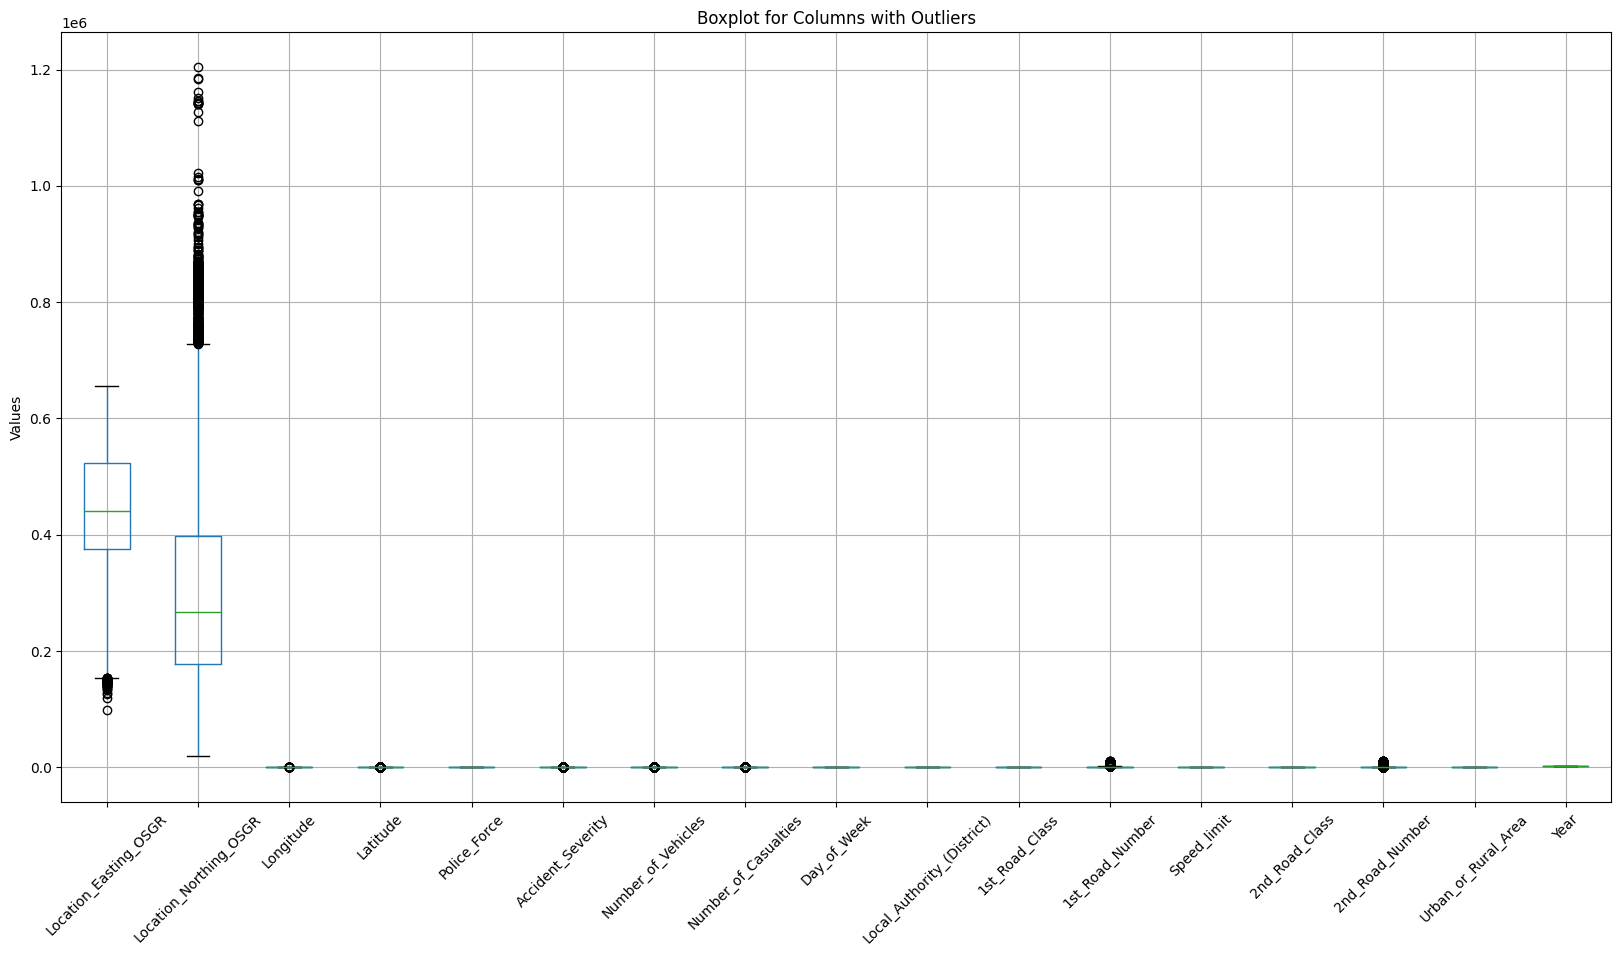

In [62]:

plt.figure(figsize=(20, 10))
df_copy[numeric_columns].boxplot() 

plt.title('Boxplot for Columns with Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [63]:
columns_with_outliers = ['Location_Easting_OSGR', 'Location_Northing_OSGR','1st_Road_Number', '2nd_Road_Number']
for col in columns_with_outliers:
  Q1 = df_copy[col].quantile(0.25)
  Q3 = df_copy[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1-1.5*IQR
  upper = Q3=1.5 * IQR
  df_copy[col] = df_copy[col].clip(lower, upper)

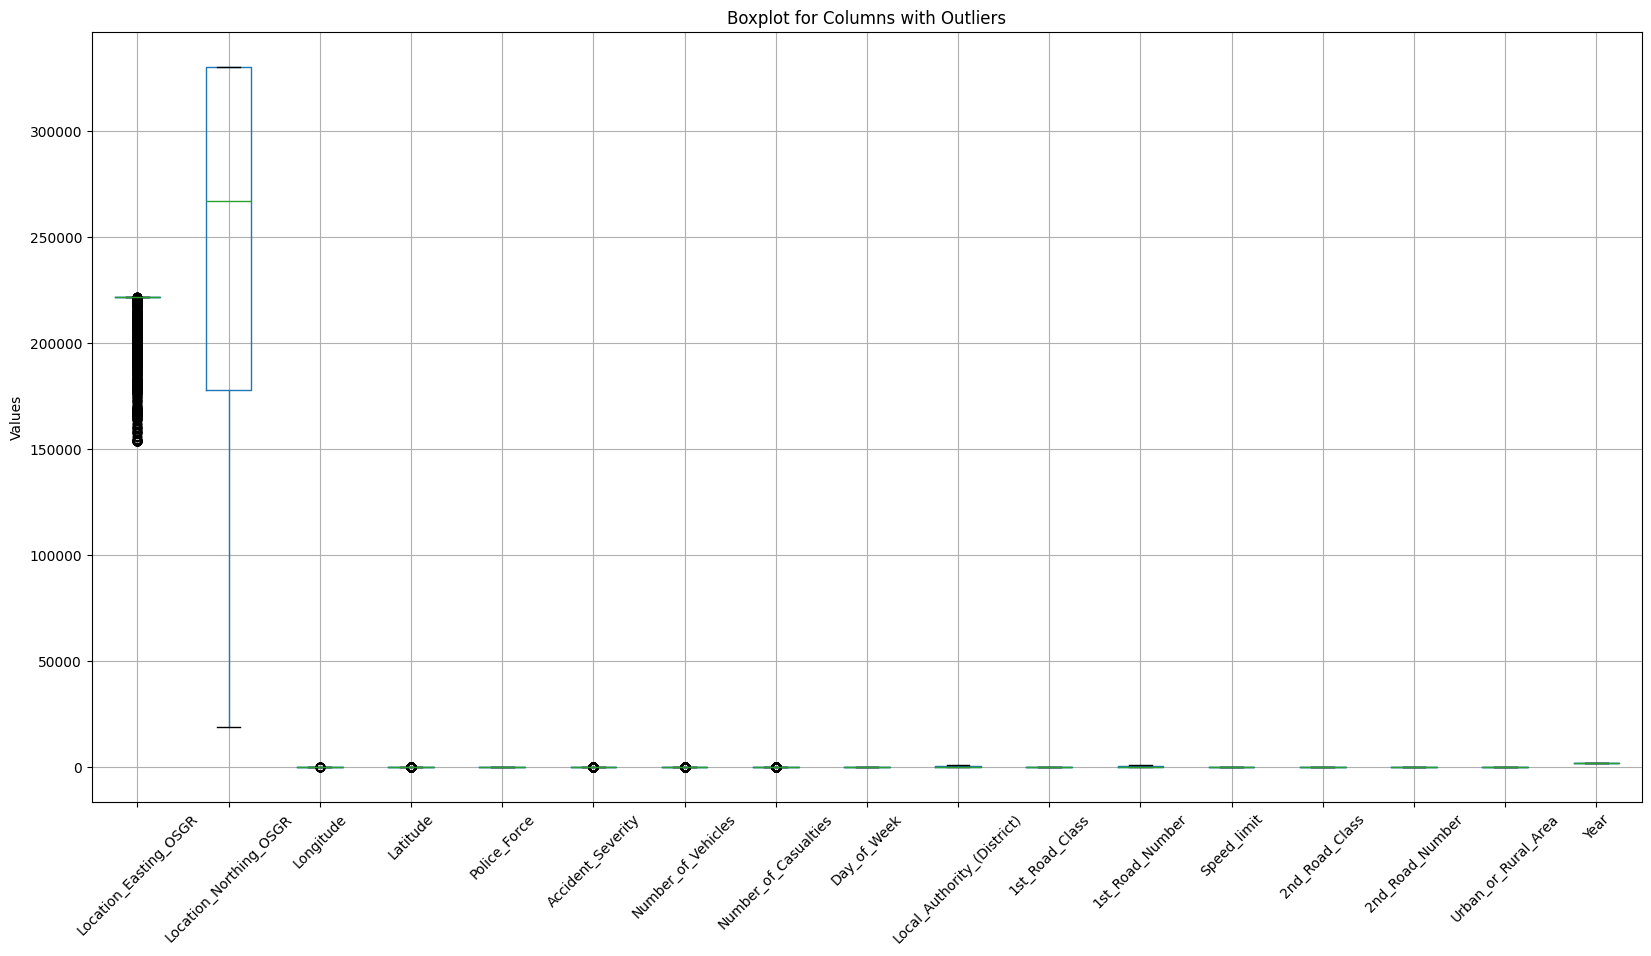

In [64]:

plt.figure(figsize=(20, 10))
df_copy[numeric_columns].boxplot() 

plt.title('Boxplot for Columns with Outliers')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [79]:
selected_features = [
    'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 
    'Speed_limit', 'Weather_Conditions', 'Road_Surface_Conditions', 
    'Light_Conditions', 'Urban_or_Rural_Area', 'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities', 'Road_Type', 
    'Did_Police_Officer_Attend_Scene_of_Accident', 'Day_of_Week'
]
# THe selected are likely to be important for identifying clusters.

# Extract selected features from the DataFrame
df_selected = df[selected_features]

In [71]:
print(df_copy.columns)

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')


In [82]:
X_preprocessed = preprocessor.fit_transform(df_copy)


In [84]:
from sklearn.utils import issparse


if issparse(X_preprocessed):
    X_preprocessed = X_preprocessed.toarray()
# Applying PCA to reduce dimensionality while preserving 90% of variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_preprocessed)

# Converting the processed data back to a DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Output to confirm the transformation
print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.865050  2.704047 -2.123269 -1.979413  0.196334 -0.526901  1.027836   
1 -2.459926  0.393872 -0.331275  0.326317 -0.395782  0.219867 -1.612407   
2  0.975018 -1.907885 -1.881081  0.060232  1.238124 -0.357897  0.094161   
3 -1.294699 -1.631058  1.073287 -0.124569  1.289273  0.976248  1.587702   
4 -0.557841 -0.948433  0.604756 -0.047494  1.366542  0.410384 -0.800549   

        PC8       PC9      PC10  ...      PC38      PC39      PC40      PC41  \
0  0.170020 -0.239656  0.408957  ...  0.208492  0.361063  0.206189 -0.062261   
1 -0.301618 -0.363572  0.249380  ... -0.011437 -0.002167 -0.018713 -0.015692   
2 -1.236610 -0.139682 -0.644576  ... -0.026860 -0.013097  0.062480  0.105114   
3 -0.244165  0.275700  1.252993  ... -0.090894 -0.077709 -0.137028 -0.064138   
4  1.416727  1.065003 -0.939501  ...  0.107404 -0.035966 -0.052427  0.035982   

       PC42      PC43      PC44      PC45      PC46      PC47  
0  0

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

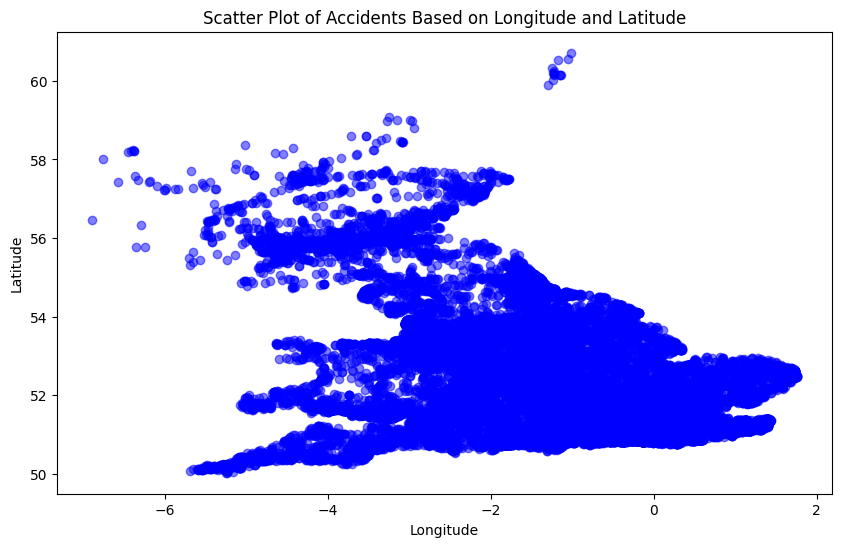

In [65]:
longitude = df['Longitude']
latitude = df['Latitude']

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c='blue', alpha=0.5, marker='o')

# Adding title and labels
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

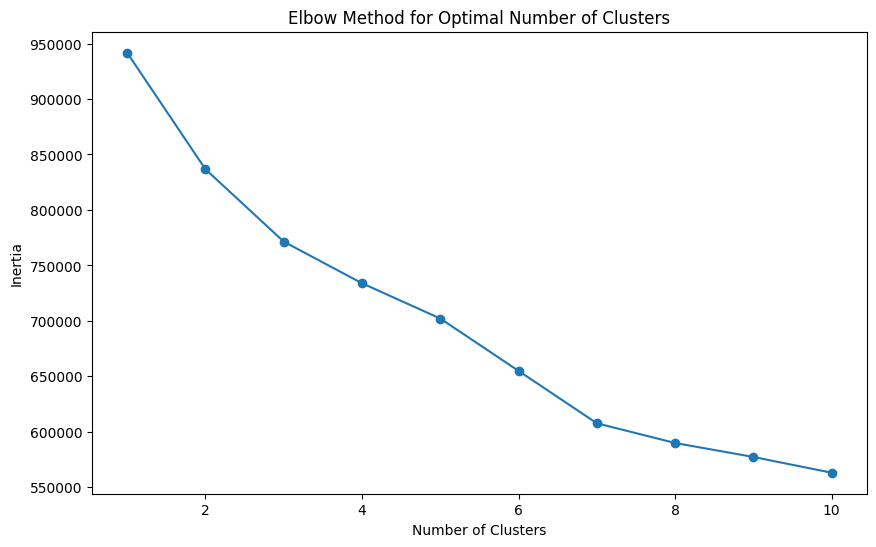

In [85]:
# Elbow method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)  # Range of clusters to evaluate

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [86]:
#  the elbow plot suggested 4-6 clusters
optimal_clusters = 4

# Train the K-Means model
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_pca)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the DataFrame
X_pca_df['Cluster'] = cluster_labels

# Output to confirm the clustering
print(X_pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.865050  2.704047 -2.123269 -1.979413  0.196334 -0.526901  1.027836   
1 -2.459926  0.393872 -0.331275  0.326317 -0.395782  0.219867 -1.612407   
2  0.975018 -1.907885 -1.881081  0.060232  1.238124 -0.357897  0.094161   
3 -1.294699 -1.631058  1.073287 -0.124569  1.289273  0.976248  1.587702   
4 -0.557841 -0.948433  0.604756 -0.047494  1.366542  0.410384 -0.800549   

        PC8       PC9      PC10  ...      PC39      PC40      PC41      PC42  \
0  0.170020 -0.239656  0.408957  ...  0.361063  0.206189 -0.062261  0.089963   
1 -0.301618 -0.363572  0.249380  ... -0.002167 -0.018713 -0.015692 -0.010991   
2 -1.236610 -0.139682 -0.644576  ... -0.013097  0.062480  0.105114  0.191500   
3 -0.244165  0.275700  1.252993  ... -0.077709 -0.137028 -0.064138 -0.056621   
4  1.416727  1.065003 -0.939501  ... -0.035966 -0.052427  0.035982 -0.102284   

       PC43      PC44      PC45      PC46      PC47  Cluster  
0 -0.

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [87]:

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.08989884333467069


## Plot the data points with their predicted cluster center

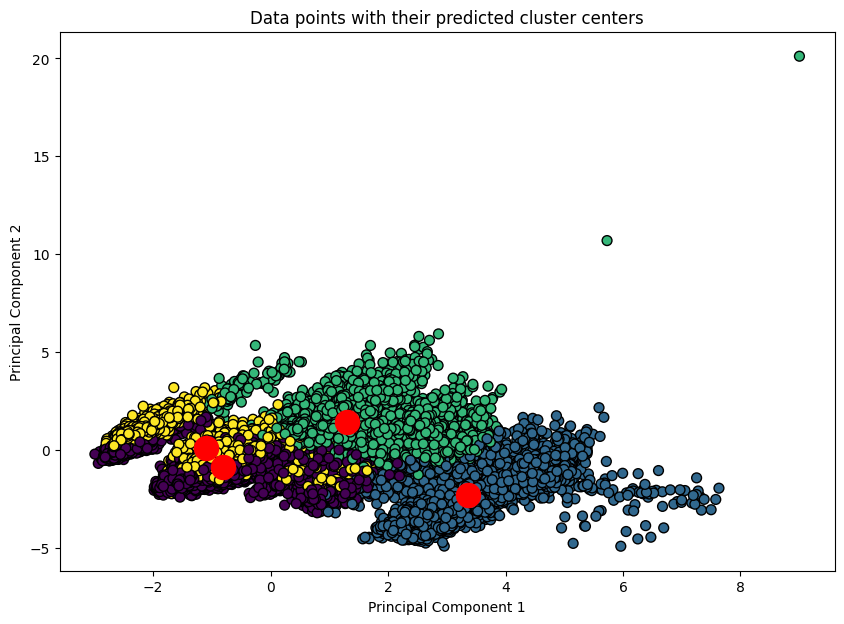

In [90]:
import matplotlib.pyplot as plt

# Plotting the clustered data
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)

# Plotting the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Data points with their predicted cluster centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?


**1:**
- **Chosen Features:** Selected features include `Longitude`, `Latitude`, `Accident_Severity`, `Number_of_Vehicles`, and `Number_of_Casualties` due to their direct relevance to clustering outcomes.

**2:**
- **Optimal Number Determination:** The Elbow Method indicated 4 clusters as optimal, where the inertia curve significantly levels off.

**3:**
- **Metrics Used:** Evaluated using the Silhouette Score for assessing cluster separation and cohesion, complemented by the Davies-Bouldin Index.

**4:**
- **Future Work:** I would Consider DBSCAN for handling noise and irregular clusters. As well as Incorporating additional temporal and contextual features for enhanced performance.
